In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
__weights_dict = dict()

def load_weights(weight_file):
    if weight_file == None:
        return

    try:
        weights_dict = np.load(weight_file).item()
    except:
        weights_dict = np.load(weight_file, encoding='bytes').item()

    return weights_dict

In [4]:
class KitModel(nn.Module):

    
    def __init__(self, weight_file):
        super(KitModel, self).__init__()
        global __weights_dict
        __weights_dict = load_weights(weight_file)

        self.batch_normalization_1 = self.__batch_normalization(2, 'batch_normalization_1', num_features=1, eps=0.0010000000474974513, momentum=0.0)
        self.conv2d_1 = self.__conv(2, name='conv2d_1', in_channels=1, out_channels=64, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.batch_normalization_2 = self.__batch_normalization(2, 'batch_normalization_2', num_features=64, eps=0.0010000000474974513, momentum=0.0)
        self.conv2d_2 = self.__conv(2, name='conv2d_2', in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.batch_normalization_3 = self.__batch_normalization(2, 'batch_normalization_3', num_features=64, eps=0.0010000000474974513, momentum=0.0)
        self.conv2d_3 = self.__conv(2, name='conv2d_3', in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.batch_normalization_4 = self.__batch_normalization(2, 'batch_normalization_4', num_features=128, eps=0.0010000000474974513, momentum=0.0)
        self.conv2d_4 = self.__conv(2, name='conv2d_4', in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.batch_normalization_5 = self.__batch_normalization(2, 'batch_normalization_5', num_features=128, eps=0.0010000000474974513, momentum=0.0)
        self.conv2d_5 = self.__conv(2, name='conv2d_5', in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.batch_normalization_6 = self.__batch_normalization(2, 'batch_normalization_6', num_features=256, eps=0.0010000000474974513, momentum=0.0)
        self.conv2d_6 = self.__conv(2, name='conv2d_6', in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.batch_normalization_7 = self.__batch_normalization(2, 'batch_normalization_7', num_features=256, eps=0.0010000000474974513, momentum=0.0)
        self.conv2d_7 = self.__conv(2, name='conv2d_7', in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.batch_normalization_8 = self.__batch_normalization(2, 'batch_normalization_8', num_features=512, eps=0.0010000000474974513, momentum=0.0)
        self.audio_embedding_layer = self.__conv(2, name='audio_embedding_layer', in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)

    def forward(self, x):
        batch_normalization_1 = self.batch_normalization_1(x)
        conv2d_1_pad    = F.pad(batch_normalization_1, (1, 1, 1, 1))
        conv2d_1        = self.conv2d_1(conv2d_1_pad)
        batch_normalization_2 = self.batch_normalization_2(conv2d_1)
        activation_1    = F.relu(batch_normalization_2)
        conv2d_2_pad    = F.pad(activation_1, (1, 1, 1, 1))
        conv2d_2        = self.conv2d_2(conv2d_2_pad)
        batch_normalization_3 = self.batch_normalization_3(conv2d_2)
        activation_2    = F.relu(batch_normalization_3)
        max_pooling2d_1 = F.max_pool2d(activation_2, kernel_size=(2, 2), stride=(2, 2), padding=0, ceil_mode=False)
        conv2d_3_pad    = F.pad(max_pooling2d_1, (1, 1, 1, 1))
        conv2d_3        = self.conv2d_3(conv2d_3_pad)
        batch_normalization_4 = self.batch_normalization_4(conv2d_3)
        activation_3    = F.relu(batch_normalization_4)
        conv2d_4_pad    = F.pad(activation_3, (1, 1, 1, 1))
        conv2d_4        = self.conv2d_4(conv2d_4_pad)
        batch_normalization_5 = self.batch_normalization_5(conv2d_4)
        activation_4    = F.relu(batch_normalization_5)
        max_pooling2d_2 = F.max_pool2d(activation_4, kernel_size=(2, 2), stride=(2, 2), padding=0, ceil_mode=False)
        conv2d_5_pad    = F.pad(max_pooling2d_2, (1, 1, 1, 1))
        conv2d_5        = self.conv2d_5(conv2d_5_pad)
        batch_normalization_6 = self.batch_normalization_6(conv2d_5)
        activation_5    = F.relu(batch_normalization_6)
        conv2d_6_pad    = F.pad(activation_5, (1, 1, 1, 1))
        conv2d_6        = self.conv2d_6(conv2d_6_pad)
        batch_normalization_7 = self.batch_normalization_7(conv2d_6)
        activation_6    = F.relu(batch_normalization_7)
        max_pooling2d_3 = F.max_pool2d(activation_6, kernel_size=(2, 2), stride=(2, 2), padding=0, ceil_mode=False)
        conv2d_7_pad    = F.pad(max_pooling2d_3, (1, 1, 1, 1))
        conv2d_7        = self.conv2d_7(conv2d_7_pad)
        batch_normalization_8 = self.batch_normalization_8(conv2d_7)
        activation_7    = F.relu(batch_normalization_8)
        audio_embedding_layer_pad = F.pad(activation_7, (1, 1, 1, 1))
        audio_embedding_layer = self.audio_embedding_layer(audio_embedding_layer_pad)
        max_pooling2d_4 = F.max_pool2d(audio_embedding_layer, kernel_size=(4, 8), stride=(4, 8), padding=0, ceil_mode=False)
        flatten_1       = max_pooling2d_4.view(max_pooling2d_4.size(0), -1)
        return max_pooling2d_4, flatten_1


    @staticmethod
    def __batch_normalization(dim, name, **kwargs):
        if   dim == 0 or dim == 1:  layer = nn.BatchNorm1d(**kwargs)
        elif dim == 2:  layer = nn.BatchNorm2d(**kwargs)
        elif dim == 3:  layer = nn.BatchNorm3d(**kwargs)
        else:           raise NotImplementedError()

        if 'scale' in __weights_dict[name]:
            layer.state_dict()['weight'].copy_(torch.from_numpy(__weights_dict[name]['scale']))
        else:
            layer.weight.data.fill_(1)

        if 'bias' in __weights_dict[name]:
            layer.state_dict()['bias'].copy_(torch.from_numpy(__weights_dict[name]['bias']))
        else:
            layer.bias.data.fill_(0)

        layer.state_dict()['running_mean'].copy_(torch.from_numpy(__weights_dict[name]['mean']))
        layer.state_dict()['running_var'].copy_(torch.from_numpy(__weights_dict[name]['var']))
        return layer

    @staticmethod
    def __conv(dim, name, **kwargs):
        if   dim == 1:  layer = nn.Conv1d(**kwargs)
        elif dim == 2:  layer = nn.Conv2d(**kwargs)
        elif dim == 3:  layer = nn.Conv3d(**kwargs)
        else:           raise NotImplementedError()

        layer.state_dict()['weight'].copy_(torch.from_numpy(__weights_dict[name]['weights']))
        if 'bias' in __weights_dict[name]:
            layer.state_dict()['bias'].copy_(torch.from_numpy(__weights_dict[name]['bias']))
        return layer

In [5]:
model = KitModel('./openl3_no_mel_layer_pytorch_weights')

In [6]:
import pickle
with open('test.pkl', 'rb') as f:
    test_data = pickle.load(f)
len(test_data)

15

---

In [7]:
with torch.set_grad_enabled(False):
    model = model.eval()
    output_got, _ = model(
        torch.Tensor(test_data[0].swapaxes(2, 3).swapaxes(1, 2))
    )
    output_got = output_got.detach().numpy()

In [8]:
output_needed = test_data[-2].swapaxes(2, 3).swapaxes(1, 2)

In [9]:
output_needed.shape, output_got.shape

((92, 512, 4, 3), (92, 512, 4, 3))

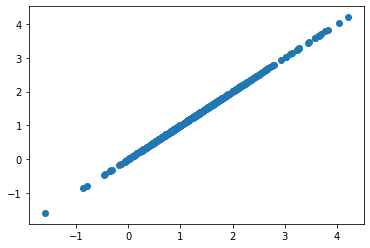

In [10]:
plt.scatter(output_needed[0, :, 0, 0], output_got[0, :, 0, 0])